    Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


    Data Description:
    
    Murder -- Muder rates in different places of United States
    Assualt- Assualt rate in different places of United States
    UrbanPop - urban population in different places of United States
    Rape - Rape rate in different places of United States

### Importing Libraries and Reading the data file

In [1]:
# Importing the Basic libraries 
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

# to remove warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
crime = pd.read_csv('crime_data.csv')
crime.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Performing EDA on the data

In [3]:
# to get the information of the datafile
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Place     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
# summarizing the datafile
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
# to check the null values of the data
crime.isnull().sum()

Place       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [7]:
print("Dimensions -",crime.shape)
print("Column names -",crime.columns)

Dimensions - (50, 5)
Column names - Index(['Place', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')


# Hierarchical Clustering 

In [8]:
# importing required libraries 
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram
from sklearn.cluster import AgglomerativeClustering # Hierarchical Clustering

### Normalization

In [9]:
# using MinMaxScaler() to normalise the data(numerical cols)
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(crime.iloc[:,1:]))
data.head()

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


### Creating Dendrogram Structure 

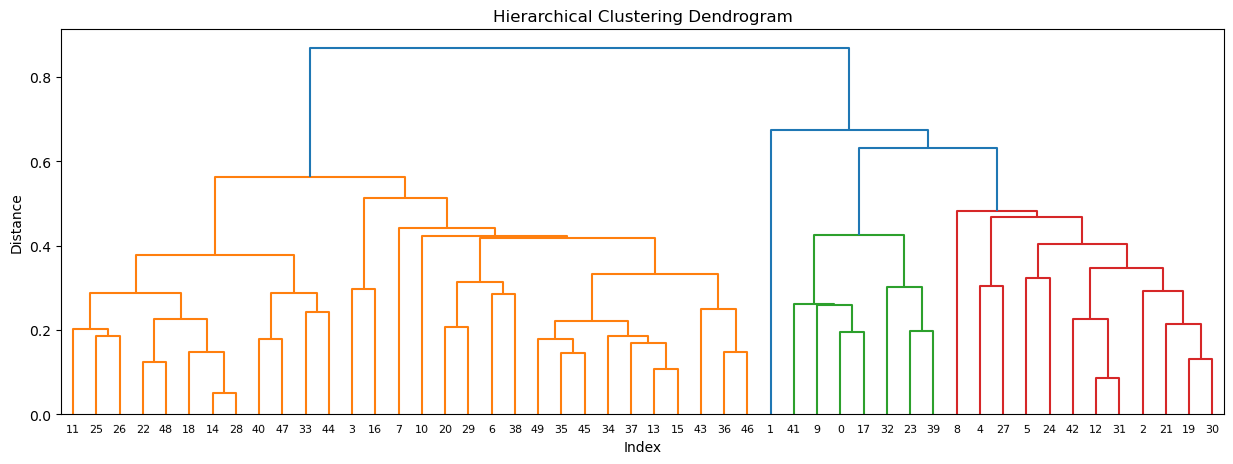

In [10]:
z = linkage(data, method="average",metric='euclidean')
plt.figure(figsize=(15,5))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,leaf_rotation=1.0)
plt.show()

### Creating hierarchical cluster

In [11]:
h_clus = AgglomerativeClustering(n_clusters=6,linkage='average',
                                 affinity='euclidean').fit(data)
clust_labels = pd.Series(h_clus.labels_)
clust_labels

# creating new column and assigning it to new column
clus_df = crime.copy()
clus_df['Cluster'] = clust_labels
clus_df.head(15)

,Place,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,5
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,3


In [12]:
# using groupby func for the summarization of data by clusters
clus_df.iloc[:,1:].groupby(clus_df.Cluster).mean()

,Murder,Assault,UrbanPop,Rape,Cluster
Cluster,,,,,
0,10.883333,256.916667,78.333333,32.250000,0.0
1,5.656250,138.875000,73.875000,18.781250,1.0
2,9.250000,149.500000,51.000000,17.900000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0
4,3.091667,76.000000,52.083333,11.833333,4.0
5,10.000000,263.000000,48.000000,44.500000,5.0


### Inferences 

In [13]:
# checking the places belonging to the cluster 4 with less crime record 
clus_df[(clus_df.Cluster==4)]

,Place,Murder,Assault,UrbanPop,Rape,Cluster
11,Idaho,2.6,120,54,14.2,4
14,Iowa,2.2,56,57,11.3,4
18,Maine,2.1,83,51,7.8,4
22,Minnesota,2.7,72,66,14.9,4
25,Montana,6.0,109,53,16.4,4
26,Nebraska,4.3,102,62,16.5,4
28,New Hampshire,2.1,57,56,9.5,4
33,North Dakota,0.8,45,44,7.3,4
40,South Dakota,3.8,86,45,12.8,4
44,Vermont,2.2,48,32,11.2,4


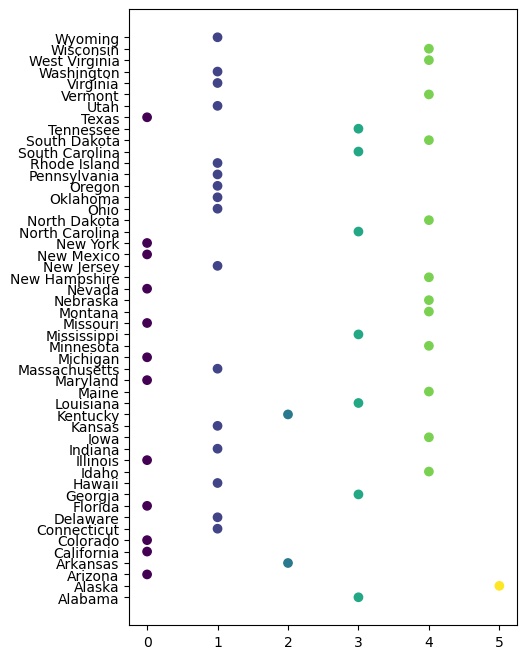

In [14]:
# Plotting the Clusters
plt.figure(figsize=(5,8))
plt.scatter(clus_df['Cluster'],clus_df['Place'], c=h_clus.labels_)
plt.show()

# K-Means Clustering 

In [15]:
# Importing KMeans function from sklearn library
from sklearn.cluster import KMeans

In [16]:
# Ten observations of the data set
crime.head(10)

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


### Normalization

In [17]:
# using MinMaxScaler() to normalise the data(numerical cols)
trans1 = MinMaxScaler()
data1 = pd.DataFrame(trans1 .fit_transform(crime.iloc[:,1:]))
data1.head()

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


### Elbow Curve for K value

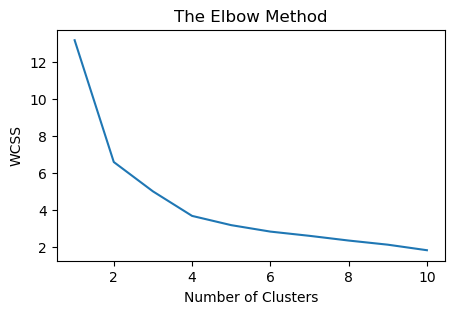

In [18]:
# plotting using ELBOW method to select best k value

fig = plt.figure(figsize=(5,3))
# WCSS - within cluster sum of square
WCSS = []
for i in range(1,11):
    clf = KMeans(n_clusters=i)
    clf.fit(data1)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Creating K-Means cluster 

In [19]:
# Prediction of the clusters to which the observations belong
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(data1)
y_kmeans

array([3, 1, 1, 4, 1, 1, 0, 4, 1, 3, 0, 2, 1, 4, 2, 4, 4, 3, 2, 1, 0, 1,
       2, 3, 4, 4, 4, 1, 2, 0, 1, 1, 3, 2, 0, 4, 4, 0, 0, 3, 2, 3, 1, 0,
       2, 4, 0, 2, 2, 4])

### Inferences 

In [20]:
# to get the centers of the clusters
clf.cluster_centers_

array([[0.25033467, 0.27549467, 0.81544256, 0.27103072],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.11325301, 0.0859589 , 0.3220339 , 0.09328165],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.37198795, 0.35416667, 0.51412429, 0.32235142]])

In [21]:
# to get the within cluster sum of square variance
clf.inertia_

3.1831577316766535

In [22]:
# converting numpy array into pandas series object
a = pd.Series(y_kmeans)
clus_df1 = crime.copy()
clus_df1['Cluster'] = a
clus_df1

,Place,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,4
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,4
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [23]:
# using groupby func for the summarization of data by clusters
clus_df1.iloc[:,1:7].groupby(clus_df1.Cluster).mean()

,Murder,Assault,UrbanPop,Rape,Cluster
Cluster,,,,,
0,4.955556,125.444444,80.111111,17.788889,0.0
1,10.966667,264.000000,76.500000,33.608333,1.0
2,2.680000,70.100000,51.000000,10.910000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0
4,6.975000,148.416667,62.333333,19.775000,4.0


In [24]:
# checking the places belonging to the cluster 2 with less crime record 
clus_df1[(clus_df1.Cluster==2)]

,Place,Murder,Assault,UrbanPop,Rape,Cluster
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
44,Vermont,2.2,48,32,11.2,2
47,West Virginia,5.7,81,39,9.3,2
48,Wisconsin,2.6,53,66,10.8,2


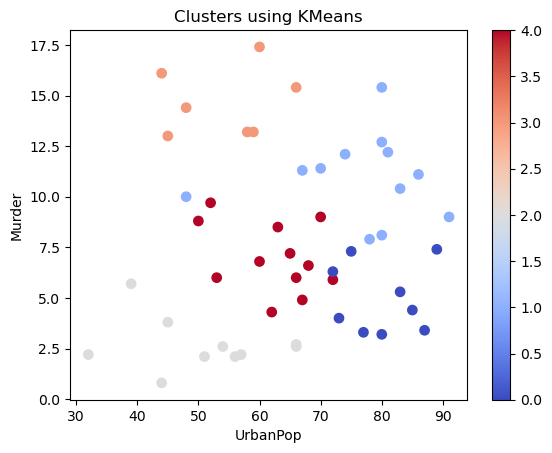

In [25]:
# Plotting the clusters 
clus_df1.plot(x="UrbanPop",y="Murder",c=clf.labels_,kind='scatter',
           s=45,cmap=plt.cm.coolwarm)
plt.title("Clusters using KMeans")
plt.show()

### Observations

- The places belonging to the Cluster 2 are more safe as they've less crime record compared to the other places.

# DBSCAN Clustering

In [26]:
# importing required libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [27]:
# head of the data set
crime.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [28]:
# dropping categorical column
data2 = crime.drop(['Place'],axis=1)
data2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


### Normalization of the data

In [29]:
# Normalization of the data using MinMaxScaler function
norm = MinMaxScaler().fit(data2.values)
trans2 = norm.transform(data2.values)
trans2

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

### Elbow Curve for Epsilon (eps) value

In [30]:
# To get the best epsilon value using ELBOW curve

from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=8) # 2n; n-no.of variables
nbrs = neigh.fit(trans2)
distances, indices = nbrs.kneighbors(trans2)

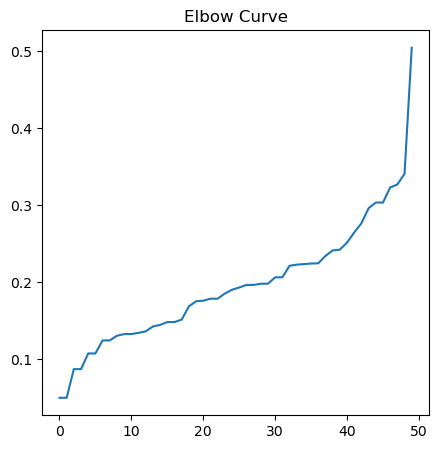

In [31]:
# plotting the distances to get epsilon value
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(5,5))
plt.plot(distances)
plt.title('Elbow Curve')
plt.show()

So, we can consider 0.3 or around 0.3 as epsilon value which is the radius for considering the near neighbors.

### Creating DBSCAN cluster

In [32]:
dbscan = DBSCAN(eps=0.28, min_samples=5)
# Here min_samples >= D+1 where D- Dimensions of data
dbscan.fit(trans2)

DBSCAN(eps=0.28)

In [33]:
# To identify the Noisy samples(outliers).. they're given -1 label
dbscan.labels_

array([-1, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [34]:
# creating dataframe for cluster column 
cl = pd.DataFrame(dbscan.labels_, columns=['Cluster'])
pd.set_option("display.max_rows",None)
cl

,Cluster
0,-1
1,-1
2,-1
3,0
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [35]:
# combining the cluster dataframe with data
clus_df2 = pd.concat([data2,cl],axis=1)
clus_df2.head()

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,-1


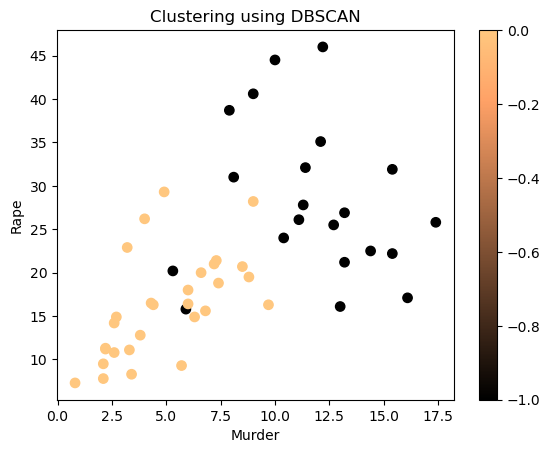

In [36]:
# Plotting the clusters
clus_df2.plot(x='Murder',y='Rape',c=dbscan.labels_,kind="scatter",s=45,cmap=plt.cm.copper)
plt.title("Clustering using DBSCAN")
plt.show()

In [37]:
# to get silhouette score
import sklearn
sklearn.metrics.silhouette_score(trans2,dbscan.labels_)

0.37836903236993435

### Inferences

In [38]:
# using groupby func for the summarization of data by clusters
clus_df2.iloc[:,:7].groupby(clus_df2.Cluster).mean()

,Murder,Assault,UrbanPop,Rape,Cluster
Cluster,,,,,
-1,11.690476,248.142857,69.190476,28.147619,-1.0
0,4.962069,114.724138,62.896552,16.224138,0.0


In [39]:
# checking the places belonging to the cluster 0 with less crime record 
clus_df2[(clus_df2.Cluster==0)]

,Murder,Assault,UrbanPop,Rape,Cluster
3,8.8,190,50,19.5,0
6,3.3,110,77,11.1,0
11,2.6,120,54,14.2,0
13,7.2,113,65,21.0,0
14,2.2,56,57,11.3,0
15,6.0,115,66,18.0,0
16,9.7,109,52,16.3,0
18,2.1,83,51,7.8,0
20,4.4,149,85,16.3,0
22,2.7,72,66,14.9,0


### Observations

- The places belonging to the Cluster 0 are more safe as they've less crime record compared to the other places.

# Conclusion

In [40]:
crime[crime.index.isin([11,14,18,22,25,26,28,33,40,44,47,48])]

,Place,Murder,Assault,UrbanPop,Rape
11,Idaho,2.6,120,54,14.2
14,Iowa,2.2,56,57,11.3
18,Maine,2.1,83,51,7.8
22,Minnesota,2.7,72,66,14.9
25,Montana,6.0,109,53,16.4
26,Nebraska,4.3,102,62,16.5
28,New Hampshire,2.1,57,56,9.5
33,North Dakota,0.8,45,44,7.3
40,South Dakota,3.8,86,45,12.8
44,Vermont,2.2,48,32,11.2
